# Stationarity & Differencing

*“Because your model hates drama — and non-stationary data is pure drama.”* 🎭

---

## 🎯 Goal
Before you unleash ARIMA or Prophet on your data, you need to check one thing:
**Is your series stationary?**

Because if your data keeps changing its mood (mean, variance, trend) —
your model will throw a fit and start predicting nonsense. 🤯

---

## 🧠 What Is Stationarity?

A time series is **stationary** if:
- Its **mean** stays roughly constant over time 🧊
- Its **variance** doesn’t explode or vanish 📈📉
- Its **autocorrelation** structure stays stable

In human terms:
> “Your data doesn’t have mood swings.”

---

### 📊 Example

| Date | Sales |
|------|--------|
| Jan  | 100 |
| Feb  | 105 |
| Mar  | 110 |
| Apr  | 115 |

Looks like sales are rising — that’s *not* stationary.
It’s like someone slowly increasing the office AC every month ❄️.

Now subtract each value from the previous one:

| Date | ΔSales (First Difference) |
|------|----------------------------|
| Feb  | 5 |
| Mar  | 5 |
| Apr  | 5 |

Boom 💥 — now it’s stationary! Constant mean, stable variance, predictable structure.

---

## 🧪 The Formal Test: ADF (Augmented Dickey-Fuller)

When in doubt, let math decide.
The **ADF test** checks whether your series has a unit root (fancy term for “non-stationary trouble”).

```python
from statsmodels.tsa.stattools import adfuller
import pandas as pd

result = adfuller(df['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
````

✅ **p-value < 0.05** → Data is *stationary*
❌ **p-value ≥ 0.05** → Data is *non-stationary* (aka “emotional wreck”)

---

## 🌀 Differencing: Your Data’s Therapy Session

Differencing removes trends by subtracting previous values:
[
y'*t = y_t - y*{t-1}
]

Repeat if your data is still unstable (just like caffeine refills ☕).

### Example: Second Difference

[
y''_t = y'*t - y'*{t-1}
]

But don’t overdo it — over-differencing makes your data as flat as your intern’s first forecast line. 📉

---

## 🧩 Other Tricks for Stationarity

| Trick                     | Use Case                       | Analogy                                                                  |
| ------------------------- | ------------------------------ | ------------------------------------------------------------------------ |
| **Log transform**         | When variance grows with level | “Calm your exponential enthusiasm.”                                      |
| **Seasonal differencing** | For yearly/monthly patterns    | “Compare each December to last December.” 🎄                             |
| **De-trending**           | Remove slow drift              | “Subtract the long-term story so we can focus on the day-to-day gossip.” |

---

## 🧠 Visual Clues

You can often *see* non-stationarity before stats confirm it:

* Trend line rising or falling steadily
* Seasonal ups and downs
* ACF plot decaying slowly (the data remembers *too much*)

```python
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df['sales'])
plt.title("Autocorrelation - Spot the Memory Problem 👀")
plt.show()
```

If your ACF looks like a long goodbye — your series isn’t stationary. 👋

---

## 🔮 Business Example:

**Scenario:** A retailer’s weekly sales are growing due to expansion.

Non-stationary → ARIMA struggles.
After first differencing → Clean, predictable pattern emerges.

**Moral:**
Don’t feed trending data to models that assume stability —
it’s like asking your HR chatbot to predict romance patterns. 💔

---

## 🧾 Quick Checklist

✅ Plot the data — any obvious trend or seasonality?
✅ Run ADF test — p < 0.05 = good to go
✅ Apply differencing/log transform if needed
✅ Confirm with visual sanity check

---

## 🧩 TL;DR

| Concept               | Translation                             |
| --------------------- | --------------------------------------- |
| Stationary Series     | Calm, predictable, model-friendly       |
| Non-Stationary Series | Chaotic, moody, model-confusing         |
| Differencing          | Subtract yesterday’s chaos from today’s |
| ADF Test              | Therapist for your time series          |

---

> “Before predicting the future, make sure your data has gotten over its past.” 😌



---
#### 9. Data Exploration
---
- **Description**: Analyzing time-ordered data to uncover underlying patterns, trends, seasonality, and anomalies. This crucial step provides vital insights into the temporal characteristics of the data before applying forecasting models.
- **Relevance**: Understanding the inherent structure of the time series data is fundamental for selecting appropriate forecasting techniques and building effective models. Visualizations and statistical summaries help in identifying key components and potential challenges.
- **Related Concepts**:
    - **Exploratory Data Analysis (EDA) for Time Series**: Adapting general EDA techniques to account for the temporal dependence in the data. This includes time series plots, decomposition, autocorrelation analysis, and stationarity checks.
    - **Data Visualization**: Utilizing specialized plots like line plots over time, seasonal subseries plots, and autocorrelation function (ACF) and partial autocorrelation function (PACF) plots. Python libraries like Matplotlib and Seaborn are invaluable here.
- **Example**: Plotting monthly sales data over several years to visually identify an upward trend and a recurring seasonal pattern within each year.

Exploratory Data Analysis (EDA) for time series data focuses on understanding how the variable of interest evolves over time.

### Common Steps in Time Series EDA:

- **Time Series Visualization**: Plotting the data against time to observe trends, seasonality, and irregular components.
    - Let $y_t$ denote the value of the time series at time $t$. A basic time series plot visualizes $(t, y_t)$ for $t = 1, 2, ..., n$, where $n$ is the number of observations.

- **Decomposition**: Separating the time series into its constituent components: trend ($T_t$), seasonality ($S_t$), and residuals ($R_t$).
    - An additive decomposition model is represented as:
    $$y_t = T_t + S_t + R_t$$
    - A multiplicative decomposition model is represented as:
    $$y_t = T_t \times S_t \times R_t$$

- **Autocorrelation Analysis**: Examining the correlation between a time series and its lagged values.
    - The autocorrelation function (ACF), $\rho(k)$, measures the linear relationship between $y_t$ and $y_{t-k}$, where $k$ is the lag.
    $$\rho(k) = \frac{Cov(y_t, y_{t-k})}{Var(y_t)}$$
    - The partial autocorrelation function (PACF) measures the correlation between $y_t$ and $y_{t-k}$ after removing the effects of the intermediate lags.

- **Stationarity Checks**: Assessing whether the statistical properties of the time series (mean, variance, autocovariance) remain constant over time.
    - A strictly stationary process has the property that its probabilistic behavior does not change over time.
    - A weakly stationary process has a constant mean, a constant variance, and an autocovariance that depends only on the lag. Tests like the Augmented Dickey-Fuller (ADF) test are used to check for stationarity.



/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_25888/4191842216.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.to_datetime(pd.date_range(start='2020-01-01', periods=60, freq='M'))


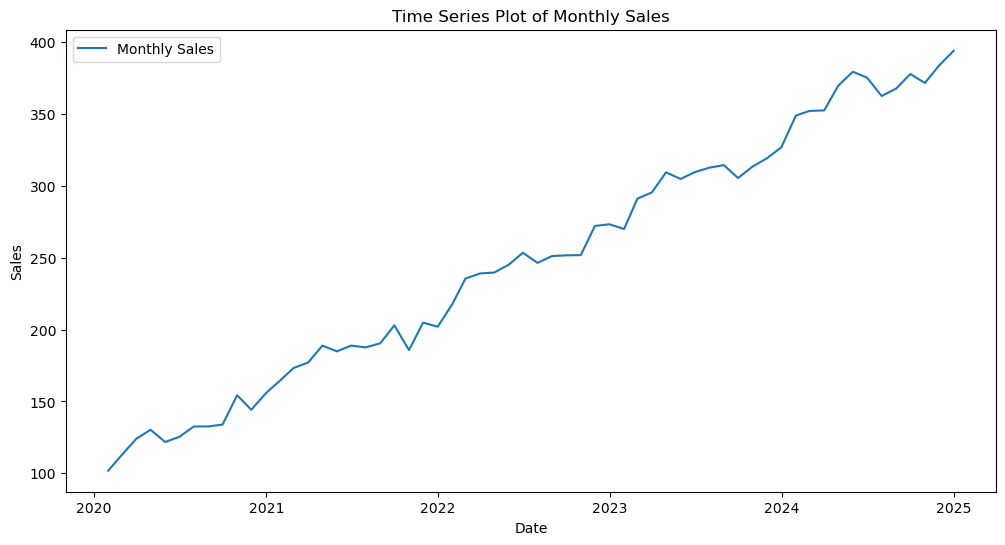

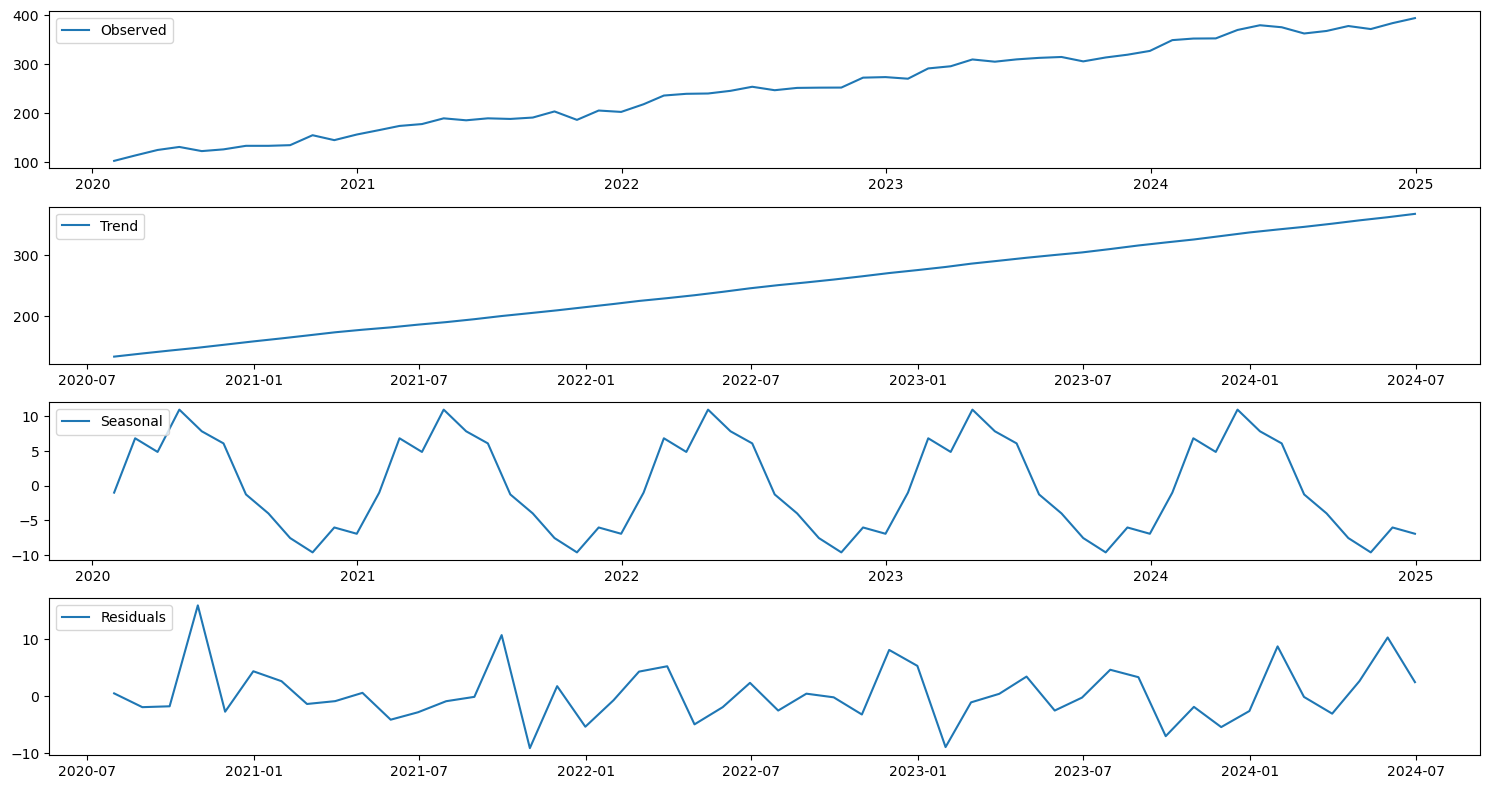

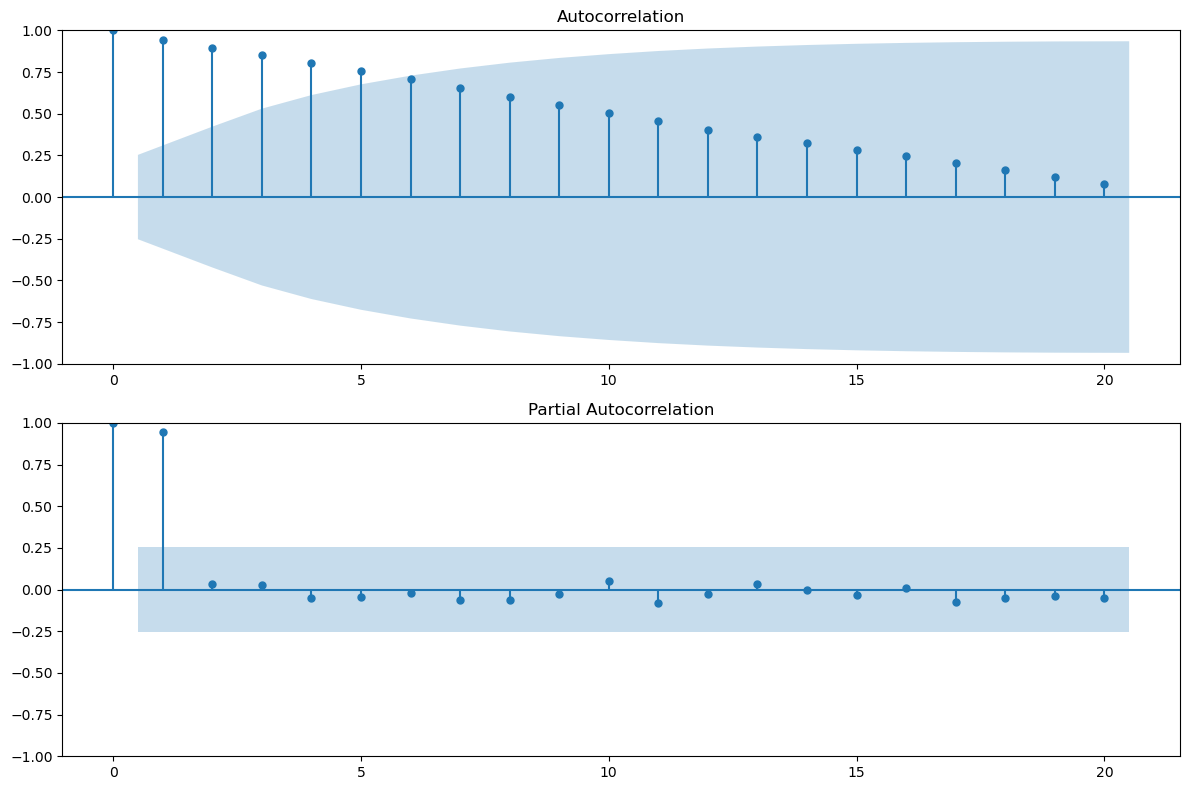

Augmented Dickey-Fuller Test:
ADF Statistic: 1.417
p-value: 0.997
Critical Values:
   1%: -3.571
   5%: -2.923
   10%: -2.599
Time series is likely non-stationary.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Sample time series data (replace with your actual data)
dates = pd.to_datetime(pd.date_range(start='2020-01-01', periods=60, freq='M'))
sales = 100 + 5 * np.arange(60) + 10 * np.sin(np.arange(60) * 2 * np.pi / 12) + np.random.normal(0, 5, 60)
time_series_data = pd.DataFrame({'Date': dates, 'Sales': sales})
time_series_data.set_index('Date', inplace=True)

# 1. Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Sales'], label='Monthly Sales')
plt.title('Time Series Plot of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 2. Decomposition
decomposition = seasonal_decompose(time_series_data['Sales'], model='additive', period=12)
plt.figure(figsize=(15, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3. Autocorrelation Analysis
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(time_series_data['Sales'], lags=20, ax=ax[0])
plot_pacf(time_series_data['Sales'], lags=20, ax=ax[1])
plt.tight_layout()
plt.show()

# 4. Stationarity Check (Augmented Dickey-Fuller Test)
print('Augmented Dickey-Fuller Test:')
adf_test = adfuller(time_series_data['Sales'])
print(f'ADF Statistic: {adf_test[0]:.3f}')
print(f'p-value: {adf_test[1]:.3f}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value:.3f}')

if adf_test[1] > 0.05:
    print("Time series is likely non-stationary.")
else:
    print("Time series is likely stationary.")

In [ ]:
# Your code here